In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
import scipy.stats as stats #Ploating QQ Plote
import matplotlib.pyplot as  plt
import seaborn as sns

In [4]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
from sklearn.impute import SimpleImputer

In [7]:
data = SimpleImputer()

df['Age']= data.fit_transform(df[['Age']])


In [8]:
X = df.iloc[:,1:3]
Y = df.iloc[:,0]

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

C:\Users\axitk\AppData\Local\Temp\ipykernel_17444\3604809598.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


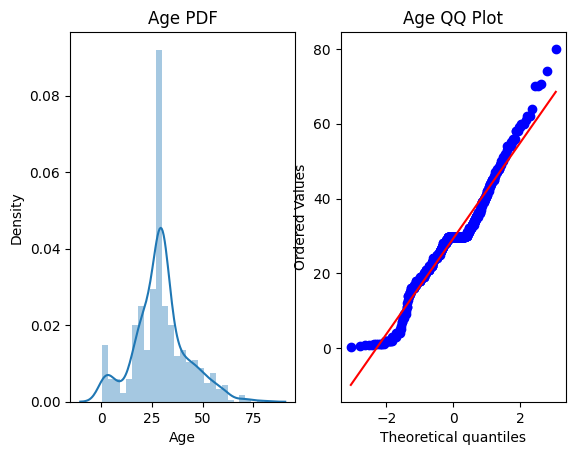

In [10]:
plt.Figure(figsize=(18,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title("Age QQ Plot")

plt.show()

C:\Users\axitk\AppData\Local\Temp\ipykernel_15284\208831355.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


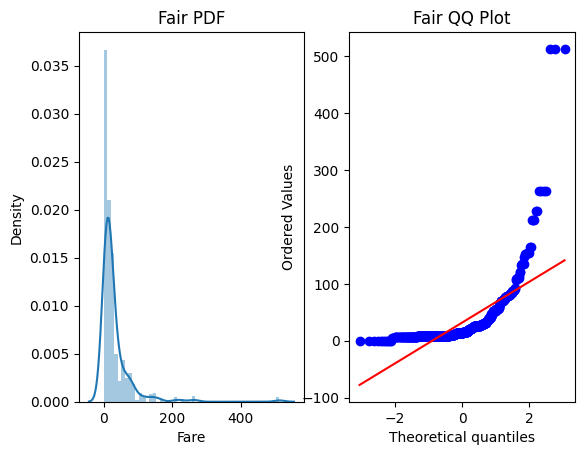

In [30]:
plt.Figure(figsize=(18,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fair PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title("Fair QQ Plot")

plt.show()

In [11]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [12]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)


y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print("Accuracy LR",accuracy_score(y_pred=y_pred,y_true=y_test))
print("Accuracy DR",accuracy_score(y_pred=y_pred1,y_true=y_test))

Accuracy LR 0.6529850746268657
Accuracy DR 0.6828358208955224


In [13]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0])

In [14]:
#it will apply on the all the column available in the array

trf = FunctionTransformer(func = np.log1p)

In [15]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.fit_transform(x_test)

In [16]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)


y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print("Accuracy LR",accuracy_score(y_pred=y_pred,y_true=y_test))
print("Accuracy DR",accuracy_score(y_pred=y_pred1,y_true=y_test))

Accuracy LR 0.6791044776119403
Accuracy DR 0.667910447761194


In [17]:
x_transformed = trf.fit_transform(X)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


print("Accuracy LR",np.mean(cross_val_score(clf,x_transformed,Y,scoring='accuracy',cv=10)))
print("Accuracy DR",np.mean(cross_val_score(clf2,x_transformed,Y,scoring='accuracy',cv=10)))

Accuracy LR 0.678027465667915
Accuracy DR 0.6566292134831461


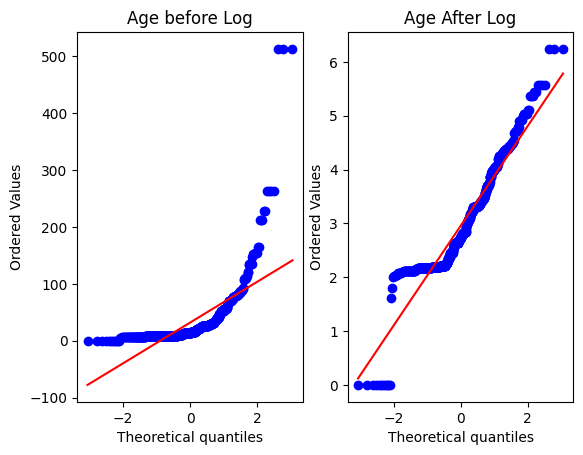

In [18]:
plt.Figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title("Age before Log")


plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
plt.title("Age After Log")

plt.show()

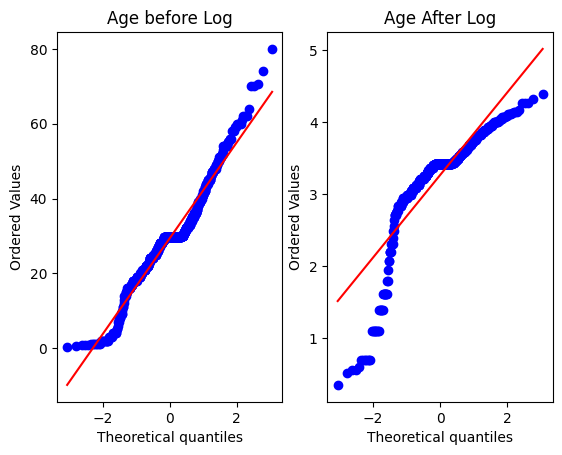

In [19]:
plt.Figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title("Age before Log")


plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
plt.title("Age After Log")

plt.show()

In [20]:
#it will apply on the column which you will specify

trf = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2 = trf.fit_transform(X=x_train)
x_test_transformed2 = trf.fit_transform(X=x_test)

In [21]:
clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)


y_pred = clf.predict(x_test_transformed2)
y_pred1 = clf2.predict(x_test_transformed2)

print("Accuracy LR",accuracy_score(y_pred=y_pred,y_true=y_test))
print("Accuracy DR",accuracy_score(y_pred=y_pred1,y_true=y_test))

Accuracy LR 0.664179104477612
Accuracy DR 0.6753731343283582


In [22]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


print("Accuracy LR",np.mean(cross_val_score(clf,x_train_transformed2,Y,scoring='accuracy',cv=10)))
print("Accuracy DR",np.mean(cross_val_score(clf2,x_train_transformed2,Y,scoring='accuracy',cv=10)))

ValueError: Found input variables with inconsistent numbers of samples: [623, 891]